# Regression Analysis

# Step 4 - Model Training, Testing & Evaluation

In [1]:
# Importing the necesssary libraries-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
file_path = '/Users/varunkashyap/Downloads/Covid 19 data.xlsx'
covid_data = pd.read_excel(file_path)

# Preprocessing the data
covid_data.dropna(inplace=True)
covid_data.drop_duplicates(inplace=True)
covid_data['date'] = pd.to_datetime(covid_data['date'], dayfirst=True)
covid_data.set_index('date', inplace=True)
monthly_data = covid_data.resample('M').sum()

# Converting datetime index to ordinal and reshape it
X = monthly_data.index.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = monthly_data['cases'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
# 1.Simple Linear Regression-

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)

print(f"Linear Regression RMSE: {linear_rmse}")


Linear Regression RMSE: 7178543.877390746


In [5]:
# 2. Multiple Linear Regression (Assuming additional features are 'Deaths' and 'popData2020')-
# Using index to match the features from covid_data with monthly_data

covid_data['Month'] = covid_data.index.month
covid_data['Year'] = covid_data.index.year
monthly_data = covid_data.groupby(['Year', 'Month']).sum()

X_mlr = monthly_data[['deaths', 'popData2020']].values
y_mlr = monthly_data['cases'].values
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=0)
mlr = LinearRegression()
mlr.fit(X_train_mlr, y_train_mlr)
y_pred_mlr = mlr.predict(X_test_mlr)
mlr_rmse = mean_squared_error(y_test_mlr, y_pred_mlr, squared=False)

print(f"Multiple Linear Regression RMSE: {mlr_rmse}")

Multiple Linear Regression RMSE: 8207443.722378175


In [6]:
# 3. Polynomial Regression-

poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)
poly_rmse = mean_squared_error(y_test, y_pred_poly, squared=False)

print(f"Polynomial Regression RMSE: {poly_rmse}")

Polynomial Regression RMSE: 7171406.177927668


In [7]:
# 4. Support Vector Regression-

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
svr_rmse = mean_squared_error(y_test, y_pred_svr, squared=False)

print(f"Support Vector Regression RMSE: {svr_rmse}")

Support Vector Regression RMSE: 8835111.768144976


In [8]:
# 5. K-Nearest Neighbors Regression-

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
knn_rmse = mean_squared_error(y_test, y_pred_knn, squared=False)

print(f"K-Nearest Neighbors Regression RMSE: {knn_rmse}")

K-Nearest Neighbors Regression RMSE: 4072512.2572322437


In [9]:
# 6. Decision Tree Regression-

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
dtr_rmse = mean_squared_error(y_test, y_pred_dtr, squared=False)

print(f"Decision Tree Regression RMSE: {dtr_rmse}")

Decision Tree Regression RMSE: 5018775.711246675


In [10]:
# 7. Random Forest Regression-

rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr_rmse = mean_squared_error(y_test, y_pred_rfr, squared=False)

print(f"Random Forest Regression RMSE: {rfr_rmse}")

Random Forest Regression RMSE: 1687474.6790187126


In [11]:
# 8. Autoregressive (AR)-
ar_model = AutoReg(y_train, lags=1)
ar_model_fit = ar_model.fit()
y_pred_ar = ar_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)
ar_rmse = mean_squared_error(y_test, y_pred_ar, squared=False)

print(f"Autoregressive RMSE: {ar_rmse}")

Autoregressive RMSE: 8437306.676445168


In [12]:
# 9. ARIMA-

arima_model = ARIMA(y_train, order=(5,1,0))
arima_model_fit = arima_model.fit()
y_pred_arima = arima_model_fit.forecast(steps=len(y_test))
arima_rmse = mean_squared_error(y_test, y_pred_arima, squared=False)

print(f"ARIMA RMSE: {arima_rmse}")

ARIMA RMSE: 10141056.713470226


In [14]:
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Multiple Linear Regression RMSE: {mlr_rmse}")
print(f"Polynomial Regression RMSE: {poly_rmse}")
print(f"Support Vector Regression RMSE: {svr_rmse}")
print(f"K-Nearest Neighbors Regression RMSE: {knn_rmse}")
print(f"Decision Tree Regression RMSE: {dtr_rmse}")
print(f"Random Forest Regression RMSE: {rfr_rmse}")
print(f"Autoregressive RMSE: {ar_rmse}")
print(f"ARIMA RMSE: {arima_rmse}")

Linear Regression RMSE: 7178543.877390746
Multiple Linear Regression RMSE: 8207443.722378175
Polynomial Regression RMSE: 7171406.177927668
Support Vector Regression RMSE: 8835111.768144976
K-Nearest Neighbors Regression RMSE: 4072512.2572322437
Decision Tree Regression RMSE: 5018775.711246675
Random Forest Regression RMSE: 1687474.6790187126
Autoregressive RMSE: 8437306.676445168
ARIMA RMSE: 10141056.713470226


In [15]:
# Saving the Random Forest Regression Model- 
joblib.dump(rfr, 'best_covid_model.pkl')

['best_covid_model.pkl']

In [20]:
# Loading the model
loaded_model = joblib.load('best_covid_model.pkl')

# Predicting for a new date-
date_ordinal = np.array([pd.to_datetime('2023-01-01').toordinal()]).reshape(-1, 1)
predicted_cases = loaded_model.predict(date_ordinal)
print(f"Predicted COVID-19 cases for 2023-01-01: {predicted_cases[0]}")

Predicted COVID-19 cases for 2023-01-01: 5092288.23


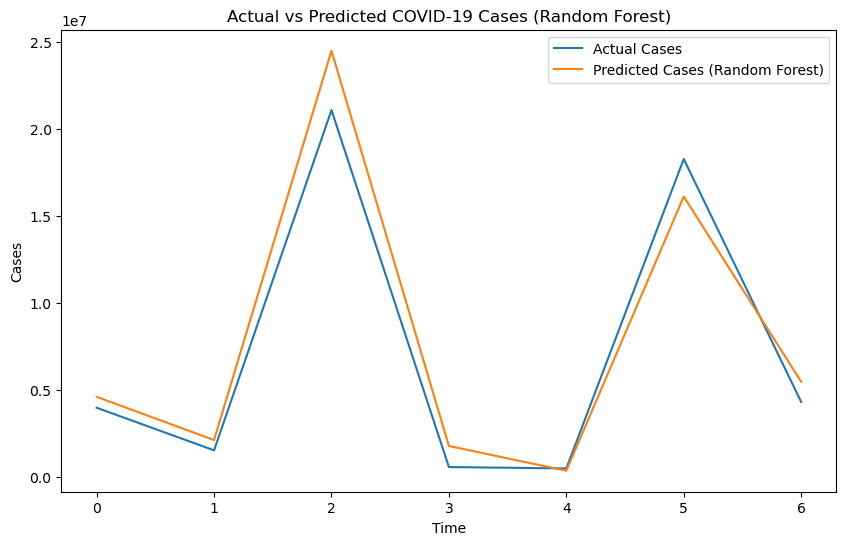

In [21]:
# actual vs predicted cases - 
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Cases')
plt.plot(y_pred_rfr, label='Predicted Cases (Random Forest)')
plt.title('Actual vs Predicted COVID-19 Cases (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


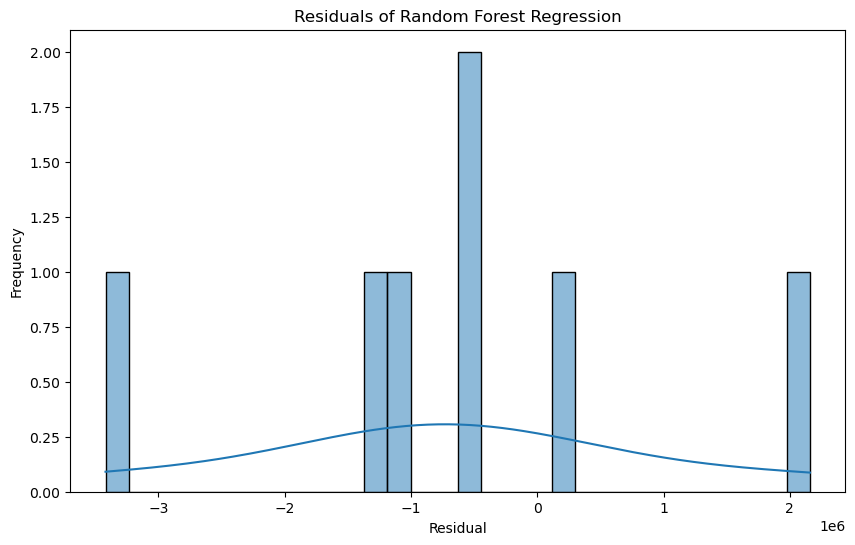

In [24]:
# Residual Plot- 
residuals = y_test - y_pred_rfr
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals of Random Forest Regression')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()